#### Explain methodology and terminology used

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import warnings
warnings.filterwarnings('ignore')

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
plt.rc("axes.spines", top=False, right=False)

In [3]:
data = pd.read_csv('athlete_events.csv')
noc = pd.read_csv('noc_regions.csv')

After reading data sets it comes natural to take a sneak peek at it, but as number of rows is too huge, only taking a look at top few rows to get the basic insight on data should be enough

In [4]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


We can see columns,data structure and also notice data types easily.
But to get the actual data types, non-null data using info method would be more appropriate.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


The basic and most important information about our data/columns is displayed. This helps us to in determinining better and appropriate techniques to use on different types of data

In [6]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


Describe function shows us the basic statistical values of numeral columns in the data set

#### Now let's dig in

Let's look at the total number of athlete participations in Olympics!

In [7]:
total_participants = data['ID'].count()
total_participants

271116

Now let's look at the total number of unique individual-athlete participations in Olympics so far!

In [8]:
unique_participants = data['ID'].nunique()
unique_participants

135571

To visualize the difference!

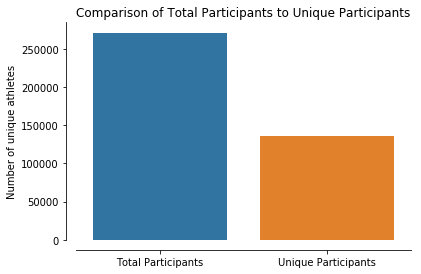

In [9]:
sns.barplot(x=['Total Participants','Unique Participants'],y=[total_participants,unique_participants])
sns.despine(offset=10)
plt.ylabel("Number of unique athletes")
plt.title("Comparison of Total Participants to Unique Participants")
plt.show()

More than half of the participants aren't unique. What does it mean? It means more than half of the participants participated *again*!

Either in different events or in different olympics! *Olympics is popular*

###### Now let's look at the gender distribution

 Participants distribution based on gender is as follows!

*(Ignoring the unique participations)*

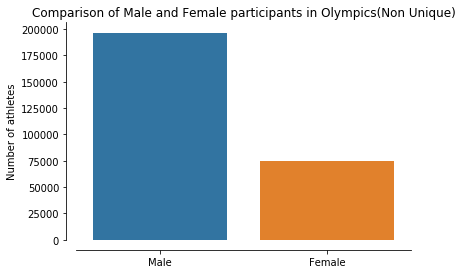

In [10]:
participation_by_gender = data.groupby('Sex')['ID'].count()
#print(participation_by_gender['M'],participation_by_gender['F'],
#      participation_by_gender['M']+participation_by_gender['F'])
sns.barplot(x=['Male','Female'],y=[participation_by_gender['M'],participation_by_gender['F']])
sns.despine(offset=10)
plt.ylabel("Number of athletes")
plt.title("Comparison of Male and Female participants in Olympics(Non Unique)")
plt.show()

For better demonstration lets plot a pie chart!

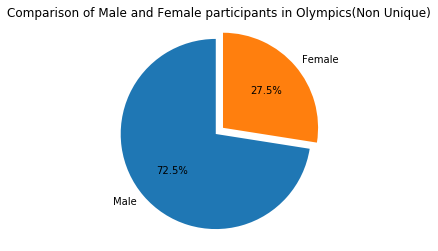

In [68]:
plt.pie(x=[participation_by_gender['M'],participation_by_gender['F']],explode=(0,0.1),labels=['Male','Female'],autopct='%1.1f%%',startangle=90)
plt.title("Comparison of Male and Female participants in Olympics(Non Unique)")
plt.axis("equal")
plt.show()

Now let's take a look at the participation of *unique athletes* based on gender!

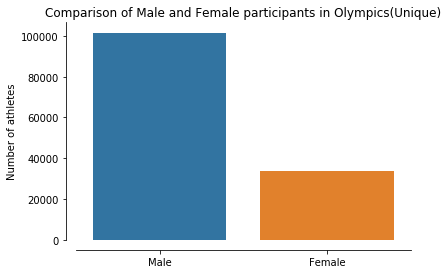

In [11]:
participation_by_gender_unique = data.groupby('Sex')['ID'].nunique()
#print(participation_by_gender_unique,participation_by_gender_unique['M']+participation_by_gender_unique['F'])
sns.barplot(x=['Male','Female'],y=[participation_by_gender_unique['M'],participation_by_gender_unique['F']])
sns.despine(offset=10)
plt.ylabel("Number of athletes")
plt.title("Comparison of Male and Female participants in Olympics(Unique)")
plt.show()

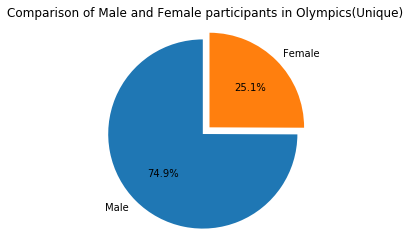

In [69]:
plt.pie(x=[participation_by_gender_unique['M'],participation_by_gender_unique['F']],explode=(0,0.1),labels=['Male','Female'],autopct='%1.1f%%',startangle=90)
plt.title("Comparison of Male and Female participants in Olympics(Unique)")
plt.axis("equal")
plt.show()

Clearly, male participation is more than the double of female participation

But the question is, __was that the case since forever__
for that let's look at the yearly participation of males and females in Olympics.

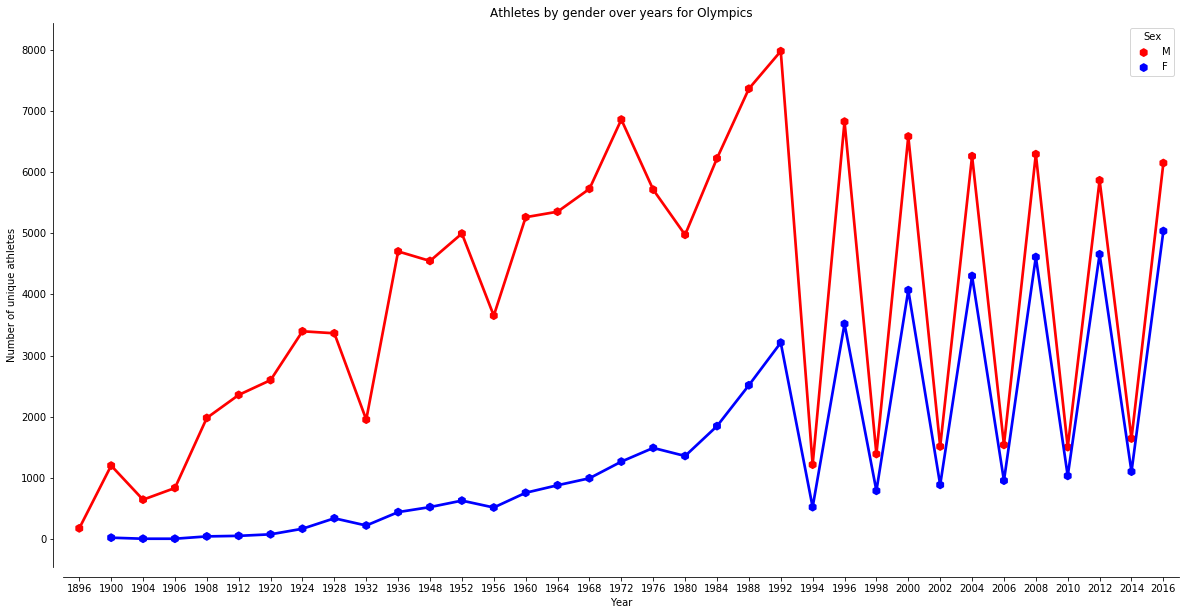

In [12]:
yearly_participation_of_genders = data.groupby(['Year','Sex'])['ID'].nunique().reset_index()
plt.figure(figsize=(20,10))
temp_p = sns.pointplot(x = yearly_participation_of_genders["Year"] , y = yearly_participation_of_genders["ID"],
                   markers="h" , hue = yearly_participation_of_genders["Sex"],palette = ["r","b"])
#plt.setp(temp_p.collections, sizes=[15])
plt.ylabel("Number of unique athletes")
plt.title("Athletes by gender over years for Olympics")
sns.despine(offset=10)
#plt.xticks(rotation = 60)


This does show us the difference in participating athletes by gender but as **Summer and Winter** olympics were seperated after 1992 it shows a weird zig zag pattern which could be misleading. We will plot both seperately!

As already discussed, there are two types of olympics: __Summer__ and __Winter__. Let's study the participation in each!

Distribution by total athletes

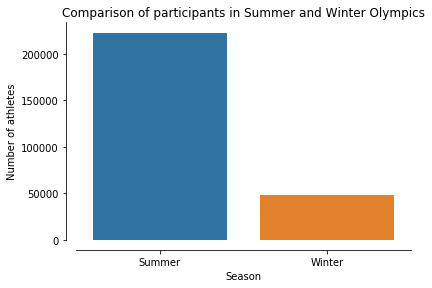

In [71]:
seasonal_participation = data.groupby(['Season'])['ID'].count().reset_index()
sns.barplot(x='Season',y='ID', data=seasonal_participation)
sns.despine(offset=10)
plt.ylabel("Number of athletes")
plt.title("Comparison of participants in Summer and Winter Olympics")
plt.show()

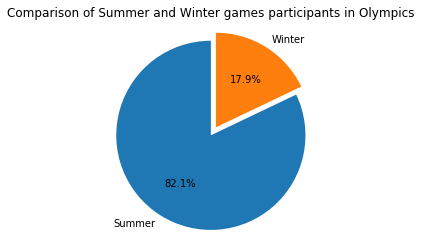

In [81]:
plt.pie(x=[seasonal_participation['ID'][0],seasonal_participation['ID'][1]],explode=(0,0.1),labels=['Summer','Winter'],autopct='%1.1f%%',startangle=90)
plt.title("Comparison of Summer and Winter games participants in Olympics")
plt.axis("equal")
plt.show()

Distribution by unique athlete participatoin

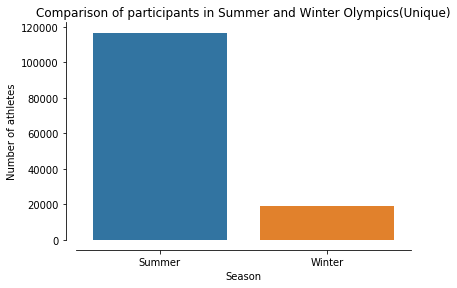

In [14]:
seasonal_participation_unique = data.groupby(['Season'])['ID'].nunique().reset_index()
sns.barplot(x='Season',y='ID', data=seasonal_participation_unique)
sns.despine(offset=10)
plt.ylabel("Number of athletes")
plt.title("Comparison of participants in Summer and Winter Olympics(Unique)")
plt.show()

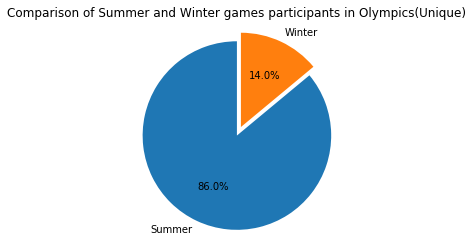

In [83]:
plt.pie(x=[seasonal_participation_unique['ID'][0],seasonal_participation_unique['ID'][1]],explode=(0,0.1),labels=['Summer','Winter'],autopct='%1.1f%%',startangle=90)
plt.title("Comparison of Summer and Winter games participants in Olympics(Unique)")
plt.axis("equal")
plt.show()

Now let's study the participation of both genders in Summer and Winter Olympics seperately!

For participations

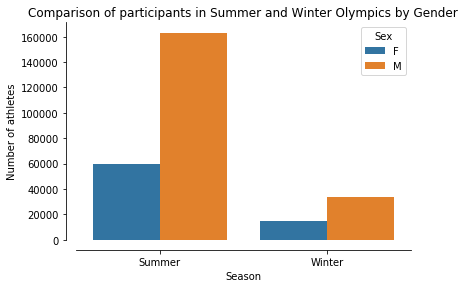

In [15]:
seasonal_participation_by_gender = data.groupby(['Season','Sex'])['ID'].count().reset_index()
sns.barplot(x="Season", y="ID", hue="Sex", data=seasonal_participation_by_gender)
sns.despine(offset=10)
plt.ylabel("Number of athletes")
plt.title("Comparison of participants in Summer and Winter Olympics by Gender")
plt.show()

For Unique participations

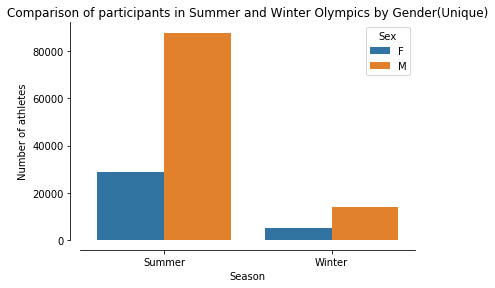

In [16]:
seasonal_participation_by_gender_unique = data.groupby(['Season','Sex'])['ID'].nunique().reset_index()
sns.barplot(x="Season", y="ID", hue="Sex", data=seasonal_participation_by_gender_unique)
sns.despine(offset=10)
plt.ylabel("Number of athletes")
plt.title("Comparison of participants in Summer and Winter Olympics by Gender(Unique)")
plt.show()

Let's look at the distribution of Participants, both genders, each year! (Unique Players!)

In [17]:
summer = data[data['Season'] == 'Summer']
winter = data[data['Season'] == 'Winter']

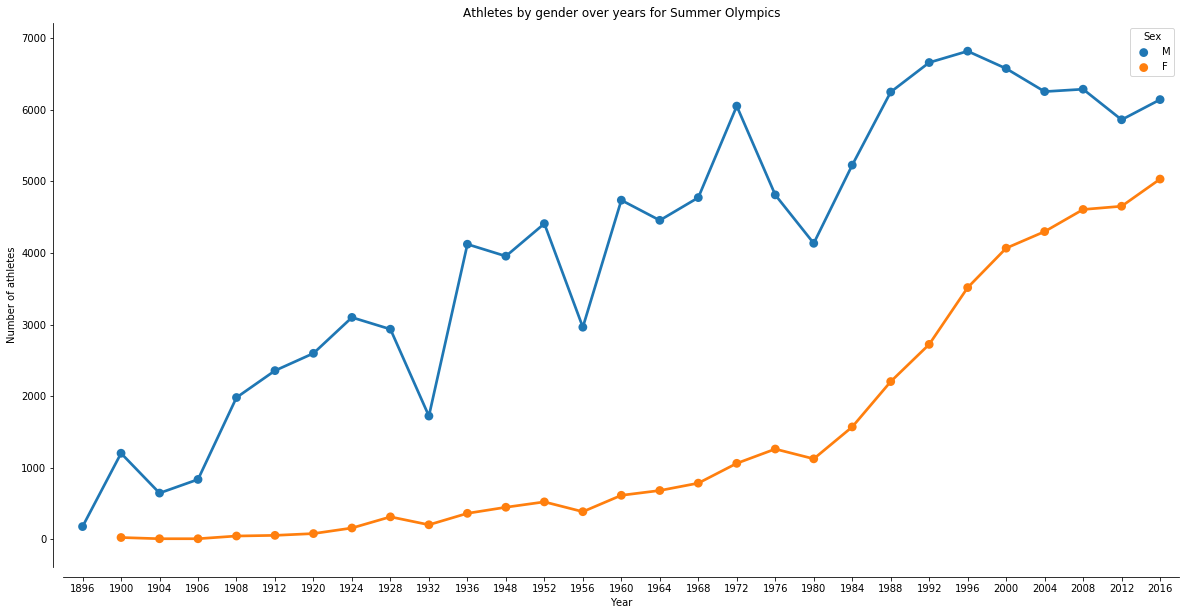

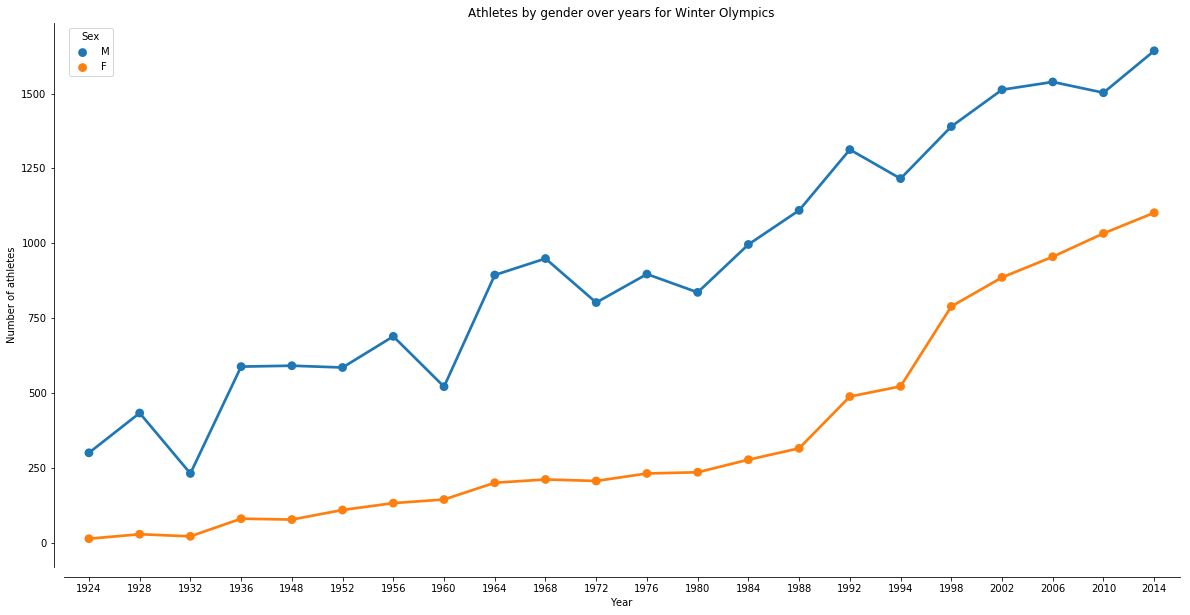

In [18]:
summer_participation_by_year_sex = summer.groupby(['Year','Sex'])['ID'].nunique().reset_index()
plt.figure(figsize=(20,10))
temp_p = sns.pointplot(data=summer_participation_by_year_sex,y='ID',x='Year',hue='Sex')
#plt.setp(temp_p.collections, sizes=[20])
plt.ylabel("Number of athletes")
plt.title("Athletes by gender over years for Summer Olympics")
sns.despine(offset=10)

winter_participation_by_year_sex = winter.groupby(['Year','Sex'])['ID'].nunique().reset_index()
plt.figure(figsize=(20,10))
temp_p = sns.pointplot(data=winter_participation_by_year_sex,y='ID',x='Year',hue='Sex',hue_order=['M','F'])
#plt.setp(temp_p.collections, sizes=[30])
plt.ylabel("Number of athletes")
plt.title("Athletes by gender over years for Winter Olympics")
sns.despine(offset=10)

We can see that participation in winter olympics is way less than summer olympics!

Also that the general trend for both genders is increase in participation! Though in start female participation was way small.

###### Let's move on to talk about Sports

Let's look at the total number of sports in olympics (Generally speaking, all sorts of sports played so far in Olympcis)

In [19]:
data['Sport'].nunique()

66

There are multiple events in a sports let's see how many are there!

In [20]:
data['Event'].nunique()

765

For comparison!

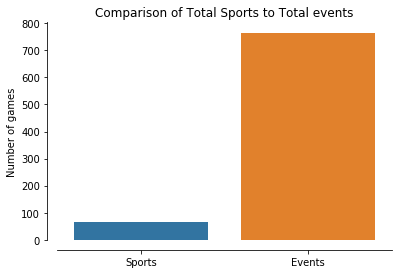

In [21]:
sns.barplot(x=['Sports','Events'],y=[data['Sport'].nunique(),data['Event'].nunique()])
sns.despine(offset=10)
plt.ylabel("Number of games")
plt.title("Comparison of Total Sports to Total events")
plt.show()

Event though this graph shows the difference between total Sports and Events in Olympics. 
We can't really extract much from this data!

Let's see how many Events are there in each sport!

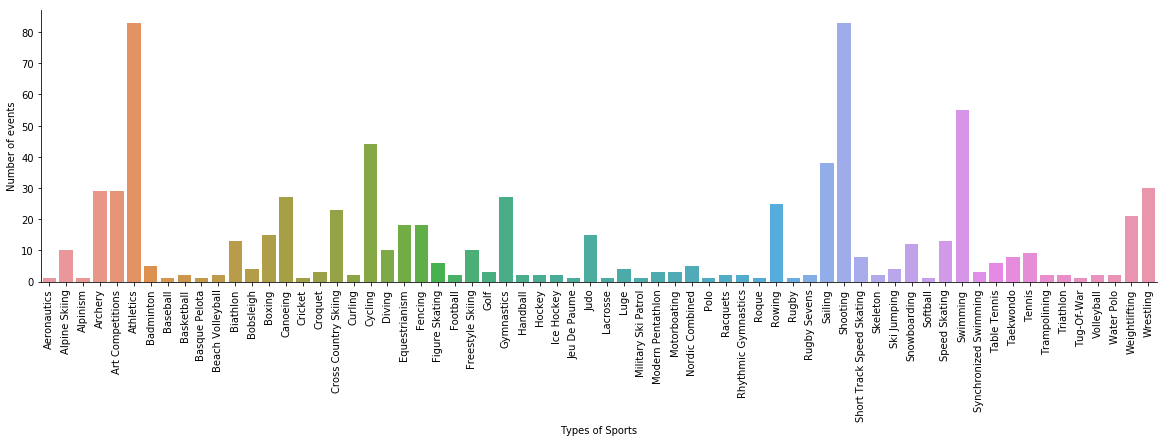

In [22]:
sport_event_ratio = data.groupby('Sport')['Event'].nunique().reset_index()
sport_event_ratio
plt.figure(figsize=(20,5))
sns.barplot(data=sport_event_ratio,x='Sport',y='Event')
plt.xlabel('Types of Sports')
plt.ylabel('Number of events')
plt.xticks(rotation = 90)
plt.show()

Now this graph better depicts the number of events per sport in Olympics!

It takes time to mature an event like Olympics. Probably there weren't all these sports/events in olympics from the start! Let's take a look at how the number of sports varied through time!


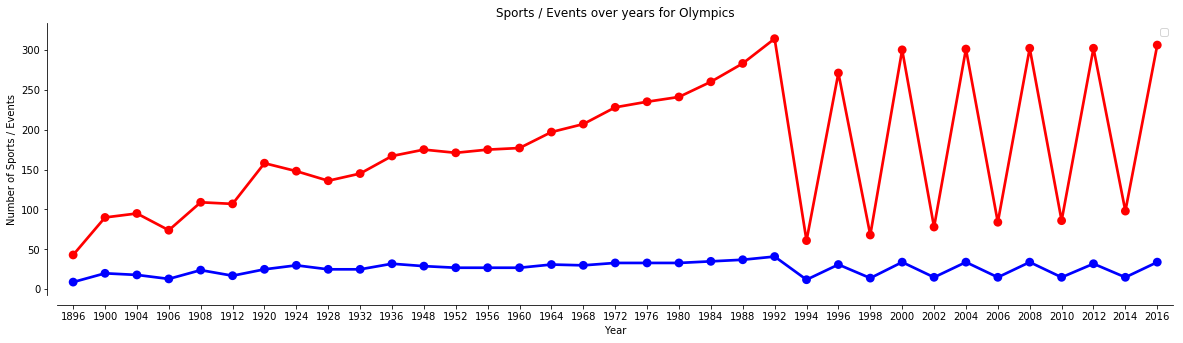

In [23]:
sport_per_year = data.groupby('Year')['Sport'].nunique().reset_index()

plt.figure(figsize=(20,5))
line1 = sns.pointplot(data=sport_per_year,y='Sport',x='Year',color='b')

event_per_year = data.groupby('Year')['Event'].nunique().reset_index()
line2 = sns.pointplot(data=event_per_year,y='Event',x='Year',color='r')

plt.ylabel("Number of Sports / Events")
plt.title("Sports / Events over years for Olympics")
sns.despine(offset=10)
plt.legend((line1,line2),('Event','Game')) #NOT Working ??
plt.show()

We can see how the number of Sports and events increase over time eventually shakling after 1992 when both Winter and Summer Olympics were set apart.
_Until 1992 the Winter and Summer Olympic Games were held in the same years, but in accordance with a 1986 decision by the IOC to place the Summer and Winter Games on separate four-year cycles in alternating even-numbered years, the next Winter Olympics after 1992 was in 1994._ WikiPedia.

That zig zag like pattern explains the difference in number of games in Summer and winter olympics!

To better explain my point! Let's make another graph!

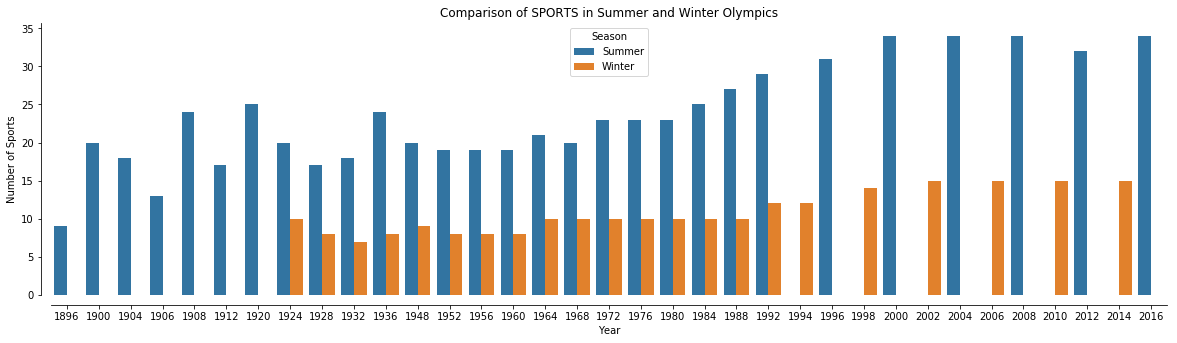

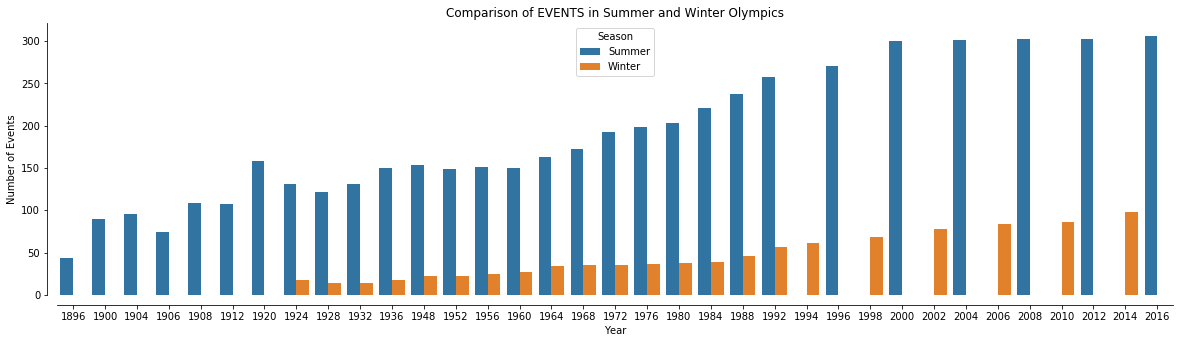

In [24]:
sport_per_year_per_season = data.groupby(['Year','Season'])['Sport'].nunique().reset_index()
#seasonal_participation_by_gender_unique = data.groupby(['Season','Sex'])['ID'].nunique().reset_index()
plt.figure(figsize=(20,5))
sns.barplot(x="Year", y="Sport", hue="Season", data=sport_per_year_per_season)
sns.despine(offset=10)
plt.ylabel("Number of Sports")
plt.title("Comparison of SPORTS in Summer and Winter Olympics")
plt.show()

event_per_year_per_season = data.groupby(['Year','Season'])['Event'].nunique().reset_index()
#seasonal_participation_by_gender_unique = data.groupby(['Season','Sex'])['ID'].nunique().reset_index()
plt.figure(figsize=(20,5))
sns.barplot(x="Year", y="Event", hue="Season", data=event_per_year_per_season)
sns.despine(offset=10)
plt.ylabel("Number of Events")
plt.title("Comparison of EVENTS in Summer and Winter Olympics")
plt.show()

From 1896 to 1920 there were no Winter Olympics! After that winter olympics were introduced which were held same year as Summer olympics!

After 1992 Olympics, Summer and Winter Olympics years were set apart with altering even years! That's why there are gaps (i.e. single bars for every year onwards)

Have a closer look!

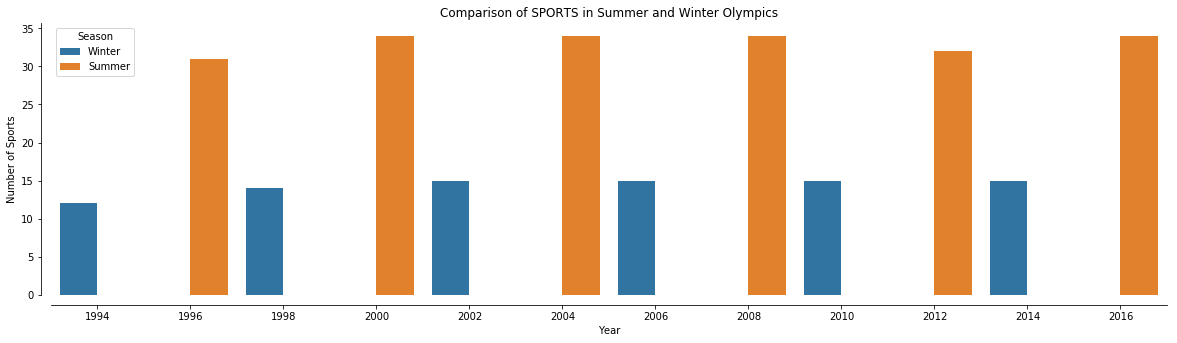

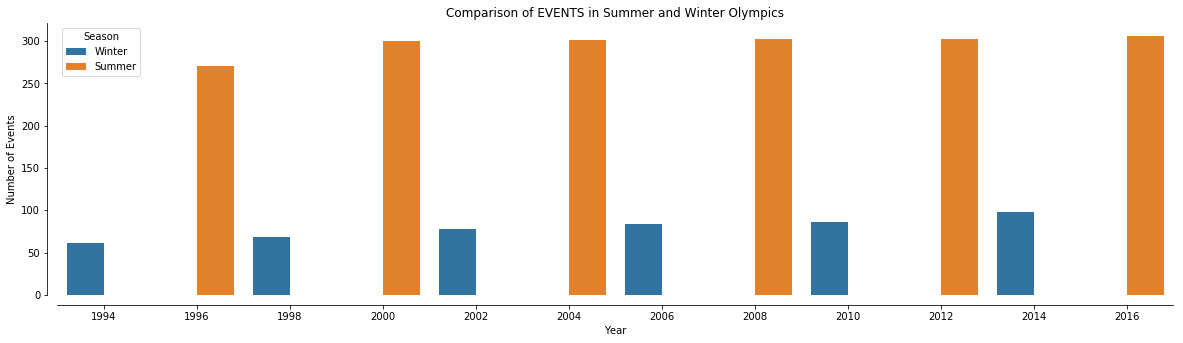

In [25]:
temp_data = data[data['Year']>1992]
sport_per_year_per_season = temp_data.groupby(['Year','Season'])['Sport'].nunique().reset_index()
#seasonal_participation_by_gender_unique = data.groupby(['Season','Sex'])['ID'].nunique().reset_index()
plt.figure(figsize=(20,5))
sns.barplot(x="Year", y="Sport", hue="Season", data=sport_per_year_per_season)
sns.despine(offset=10)
plt.ylabel("Number of Sports")
plt.title("Comparison of SPORTS in Summer and Winter Olympics")
plt.show()

event_per_year_per_season = temp_data.groupby(['Year','Season'])['Event'].nunique().reset_index()
#seasonal_participation_by_gender_unique = data.groupby(['Season','Sex'])['ID'].nunique().reset_index()
plt.figure(figsize=(20,5))
sns.barplot(x="Year", y="Event", hue="Season", data=event_per_year_per_season)
sns.despine(offset=10)
plt.ylabel("Number of Events")
plt.title("Comparison of EVENTS in Summer and Winter Olympics")
plt.show()

See? There are only one seasonal olympics in a year!

#### Distribution

Let's move on to study the **distribution** of numerical data-features available!

Distribution of Age of participating athletes!

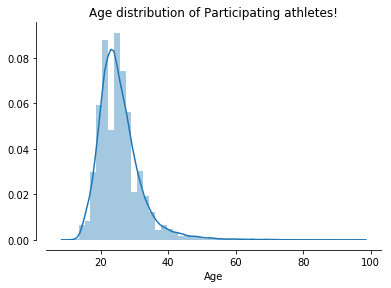

In [26]:
sns.distplot(a=data['Age'].dropna(),norm_hist=True)
sns.despine(offset=10)
plt.title("Age distribution of Participating athletes!")
plt.show()

Distribution of Height of participating athletes!

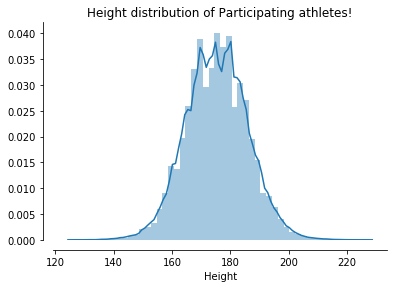

In [27]:
#Distribution of Height
sns.distplot(data['Height'].dropna())
sns.despine(offset=10)
plt.title("Height distribution of Participating athletes!")
plt.show()

Distribution of Weight of participating athletes!

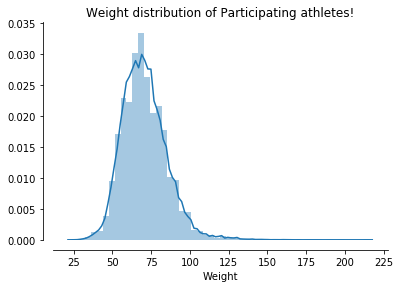

In [28]:
#Distribution of Weight
sns.distplot(data['Weight'].dropna())
sns.despine(offset=10)
plt.title("Weight distribution of Participating athletes!")
plt.show()

These are the distributions of Age,Height and weight of participating athletes! But what if we're interested in the distribution but seperately for both genders? It could get us to some interesting insights

##### Distribution Plots of both genders!

In [29]:
male = data[data['Sex'] == 'M'].dropna()
female = data[data['Sex'] == 'F'].dropna()

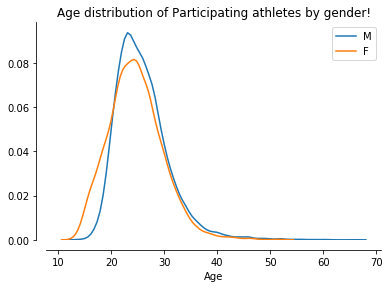

In [30]:
sns.distplot(male['Age'],hist=False,label='M')
sns.distplot(female['Age'],hist=False,label='F')
sns.despine(offset=10)
plt.title("Age distribution of Participating athletes by gender!")
plt.show()

As depicted in the graph! The age range of participating females is greater than males to the lower limit. I.e. more younger females participated in olympics than males!

Though the majority of both genderes was in the range of 20 to 30

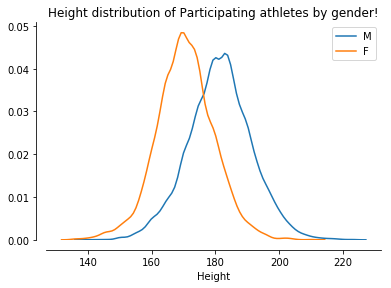

In [31]:
sns.distplot(male['Height'],hist=False,label='M')
sns.distplot(female['Height'],hist=False,label='F')
sns.despine(offset=10)
plt.title("Height distribution of Participating athletes by gender!")
plt.show()

As depicted by the graph! Height of the majority of participating females was less than males.

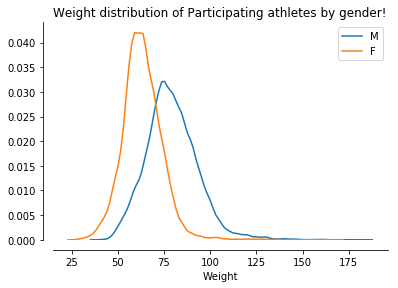

In [32]:
sns.distplot(male['Weight'],hist=False,label='M')
sns.distplot(female['Weight'],hist=False,label='F')
sns.despine(offset=10)
plt.title("Weight distribution of Participating athletes by gender!")
plt.show()

As depicted by the graph! Weight of the majority of participating females was less than males.

###### Let's see if there was any co-relation between any of the numerical features!

Let's map the height to weight relationship.

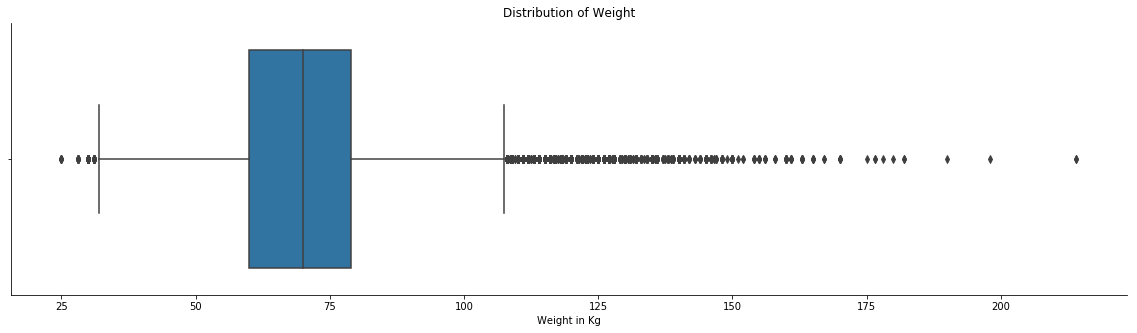

In [187]:
plt.figure(figsize=(20,5))
sns.boxplot(data=data,x='Weight')
plt.title('Distribution of Weight')
plt.xlabel('Weight in Kg')
plt.show()

We found some outlier.

In [86]:
data[data['Weight']>200][['Name','Weight','Sport','Event']].drop_duplicates()

,Name,Weight,Sport,Event
23155,"Ricardo Blas, Jr.",214.0,Judo,Judo Men's Heavyweight


In [193]:
data[data['Weight']<=25][['Name','Weight','Age','Sport','Event','NOC']].drop_duplicates()

,Name,Weight,Age,Sport,Event,NOC
40849,Choi Myong-Hui,25.0,14.0,Gymnastics,Gymnastics Women's Individual All-Around,PRK
40850,Choi Myong-Hui,25.0,14.0,Gymnastics,Gymnastics Women's Team All-Around,PRK
40851,Choi Myong-Hui,25.0,14.0,Gymnastics,Gymnastics Women's Floor Exercise,PRK
40852,Choi Myong-Hui,25.0,14.0,Gymnastics,Gymnastics Women's Horse Vault,PRK
40853,Choi Myong-Hui,25.0,14.0,Gymnastics,Gymnastics Women's Uneven Bars,PRK
40854,Choi Myong-Hui,25.0,14.0,Gymnastics,Gymnastics Women's Balance Beam,PRK


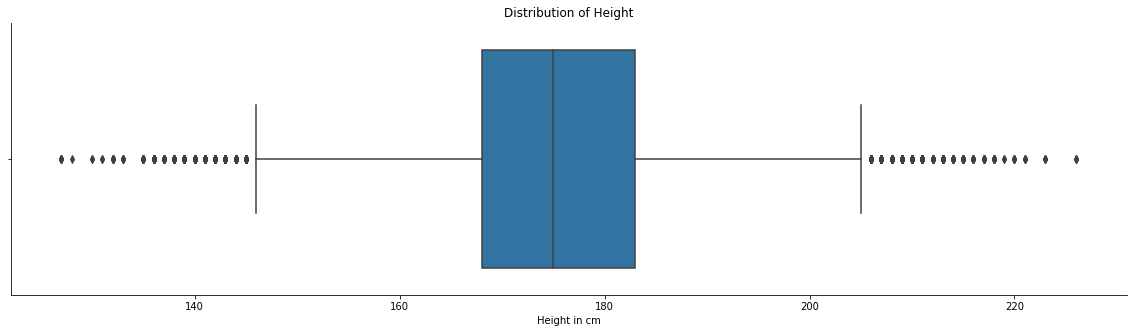

In [182]:
plt.figure(figsize=(20,5))
sns.boxplot(data=data,x='Height')
plt.title('Distribution of Height')
plt.xlabel('Height in cm')
plt.show()

In [85]:
data[data['Height']>220][['Name','Height','Sport','Event']].drop_duplicates()

,Name,Height,Sport,Event
17669,Gunther Behnke,221.0,Basketball,Basketball Men's Basketball
32376,Tommy Loren Burleson,223.0,Basketball,Basketball Men's Basketball
59371,Roberto Dueas Hernndez,221.0,Basketball,Basketball Men's Basketball
207373,Arvydas Romas Sabonis,223.0,Basketball,Basketball Men's Basketball
265040,Yao Ming,226.0,Basketball,Basketball Men's Basketball
269053,Zhang Zhaoxu,221.0,Basketball,Basketball Men's Basketball


In [186]:
data[data['Height']<130][['Name','Height','Sport','Event']].drop_duplicates()

,Name,Height,Sport,Event
29333,Rosario Briones,127.0,Gymnastics,Gymnastics Women's Individual All-Around
29334,Rosario Briones,127.0,Gymnastics,Gymnastics Women's Team All-Around
29335,Rosario Briones,127.0,Gymnastics,Gymnastics Women's Floor Exercise
29336,Rosario Briones,127.0,Gymnastics,Gymnastics Women's Horse Vault
29337,Rosario Briones,127.0,Gymnastics,Gymnastics Women's Uneven Bars
29338,Rosario Briones,127.0,Gymnastics,Gymnastics Women's Balance Beam
164821,Lyton Levison Mphande,127.0,Boxing,Boxing Men's Light-Welterweight
180615,Helman Palije,128.0,Boxing,Boxing Men's Middleweight


Studying distribution of age

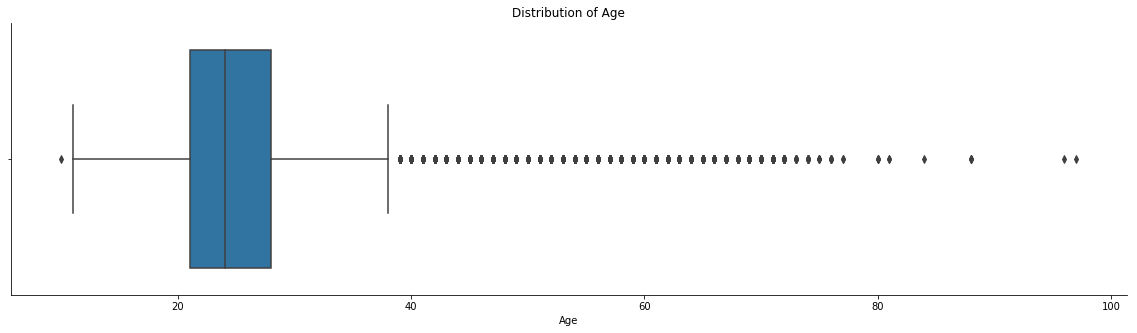

In [178]:
plt.figure(figsize=(20,5))
sns.boxplot(data=data,x='Age')
plt.title('Distribution of Age')
plt.show()

In [37]:
data[data['Age']>80][['Name','Age']].drop_duplicates()

,Name,Age
9371,George Denholm Armour,84.0
60861,Thomas Cowperthwait Eakins,88.0
98118,Winslow Homer,96.0
154855,Robert Tait McKenzie,81.0
236912,Louis Tauzin,81.0
257054,John Quincy Adams Ward,97.0


Woah!

In [38]:
display(data[data['Age']> 80])

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
9371,5146,George Denholm Armour,M,84.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
60861,31173,Thomas Cowperthwait Eakins,M,88.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
60862,31173,Thomas Cowperthwait Eakins,M,88.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
60863,31173,Thomas Cowperthwait Eakins,M,88.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
98118,49663,Winslow Homer,M,96.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
154855,77710,Robert Tait McKenzie,M,81.0,NaN,NaN,Canada,CAN,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN
236912,118789,Louis Tauzin,M,81.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Sculpturing,NaN
257054,128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN


All these were in Art Competitons!

##### Lets study these distributions over time!

Let's look at the distribution of age over years by gender!

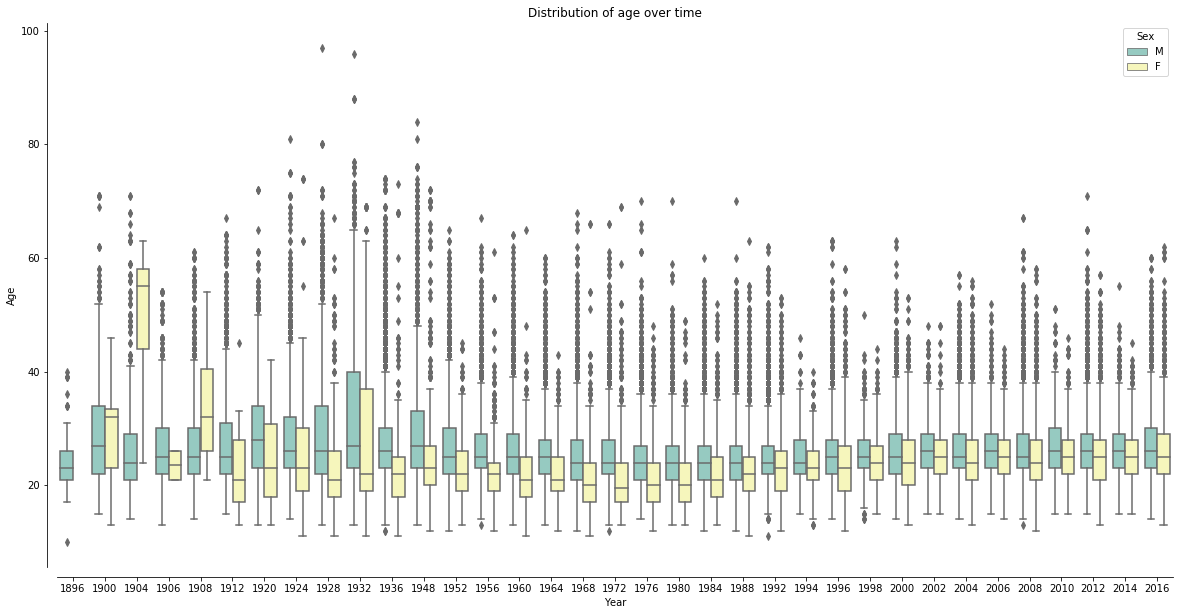

In [210]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data,x='Year',y='Age',hue='Sex', palette="Set3")
sns.despine(offset=10)
plt.title('Distribution of age over time')
plt.show()

Notice 1904, 1932 and that outlier in 1896

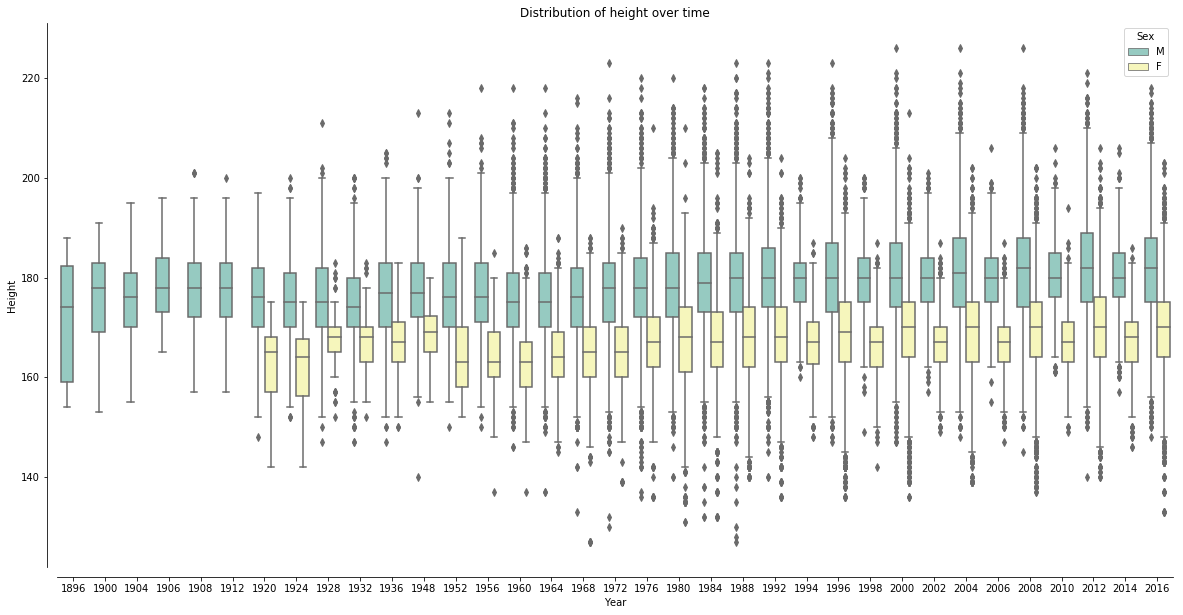

In [211]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data,x='Year',y='Height',hue='Sex', palette="Set3")
sns.despine(offset=10)
plt.title('Distribution of height over time')
plt.show()

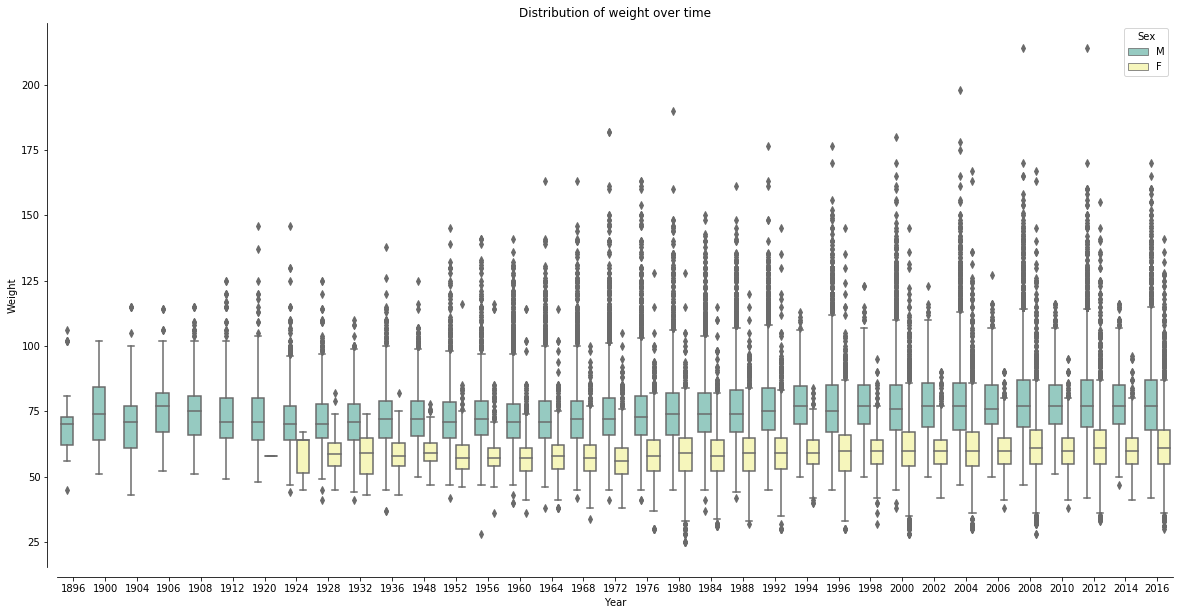

In [212]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data,x='Year',y='Weight',hue='Sex', palette="Set3")
sns.despine(offset=10)
plt.title('Distribution of weight over time')
plt.show()

##### Correlations

To check if there could be any correlations and expand our understanding and comparison we can plot all relations together with the individual distributions of all three features!

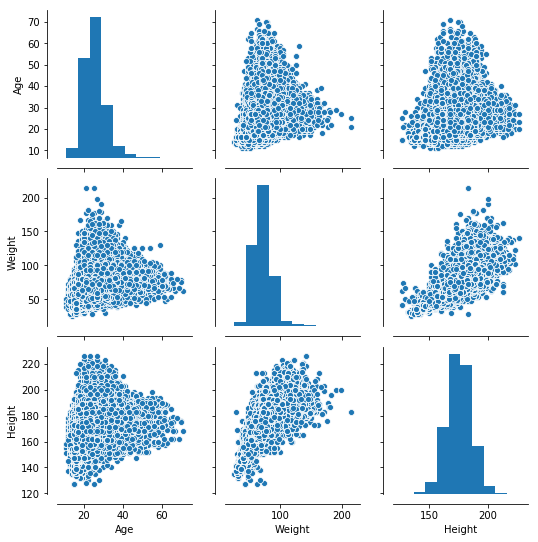

In [43]:
tmp_data = data[['Age','Weight','Height']]
tmp_data = tmp_data.dropna()
tmp_data.sort_values('Age')
sns.pairplot(tmp_data)
sns.despine(offset=10)
plt.show()

We can extract a lot of interesting insights from these plots!
Like where the majority of athletes fall for age,height and weight!

Also study these features inrelation to other features!

We did analyze the 

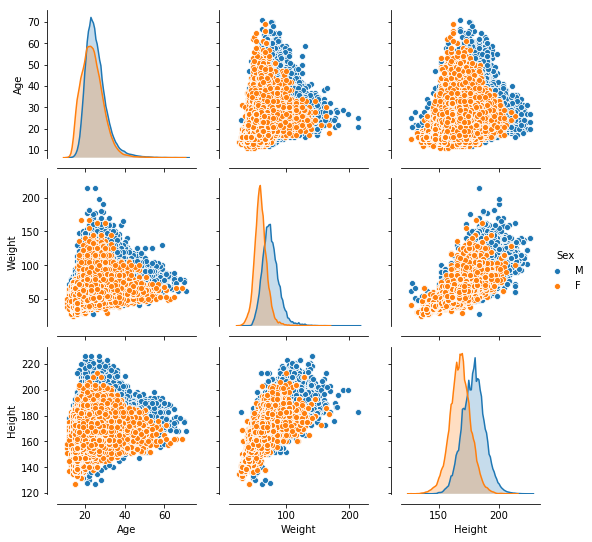

In [44]:
tmp_data = data[['Age','Weight','Height','Sex']]
tmp_data = tmp_data.dropna()
tmp_data.sort_values('Age')
sns.pairplot(tmp_data,hue='Sex')
sns.despine(offset=10)
plt.show()

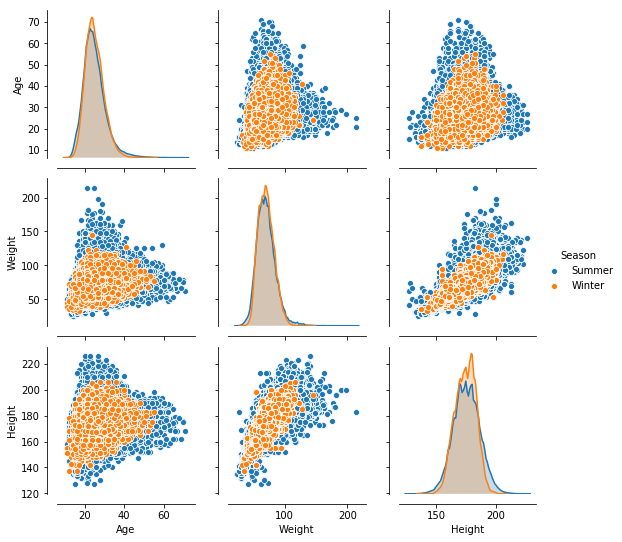

In [45]:
tmp_data = data[['Age','Weight','Height','Season']]
tmp_data = tmp_data.dropna()
tmp_data.sort_values('Age')
sns.pairplot(tmp_data,hue='Season')
sns.despine(offset=10)
plt.show()

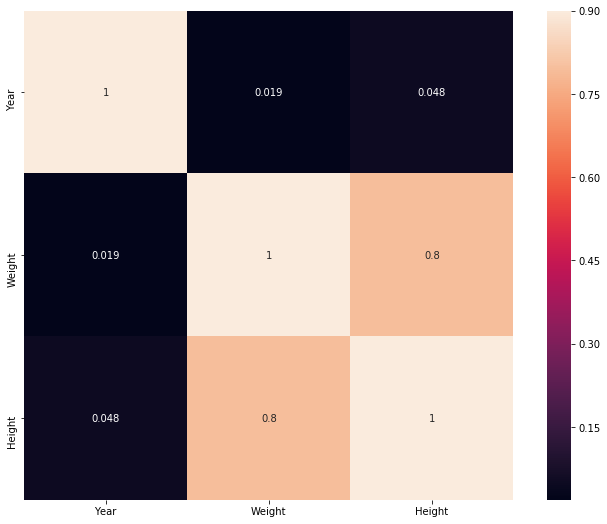

In [89]:
corrmat = data[['Year','Weight','Height']].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9, square=True,annot=True)
plt.show()

Nothing interesting! :|

Let's look at the **Participation of different countires** in Olympics (1896 - 2016)

In [50]:
#p = sns.barplot(x=per_country_participation.index,y=per_country_participation.values,orient='h')

#Orient parameter here should have resolveed the xlabel overlapping issue but it was generating a weird error that,
#so far, I have been unable to resolve.

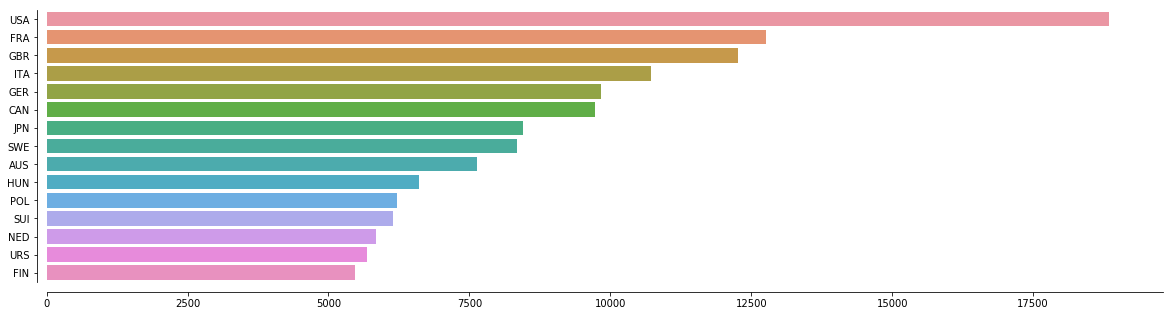

In [98]:
per_country_participation = data['NOC'].value_counts().nlargest(15)
plt.figure(figsize=(20,5))
sns.barplot(y=per_country_participation.index,x=per_country_participation.values)
sns.despine(offset=10)

###### What did I extract!
As clearly seen from the graph the most participating country in Olympics is USA, followed by France > Britain and so on to NFL (New Found Land (Canada)) being the lowest participator.

###### Medals won by countries

Let's see which countries won maximum medals over the specified period of Olympics

In [52]:
medal_distribution_by_country = data.groupby('NOC')['Medal'].count()
#medal_distribution_by_country.idxmax()

In [53]:
# Filtering out countries who have won no medal so far
medal_distribution_by_country = medal_distribution_by_country[medal_distribution_by_country > 0]

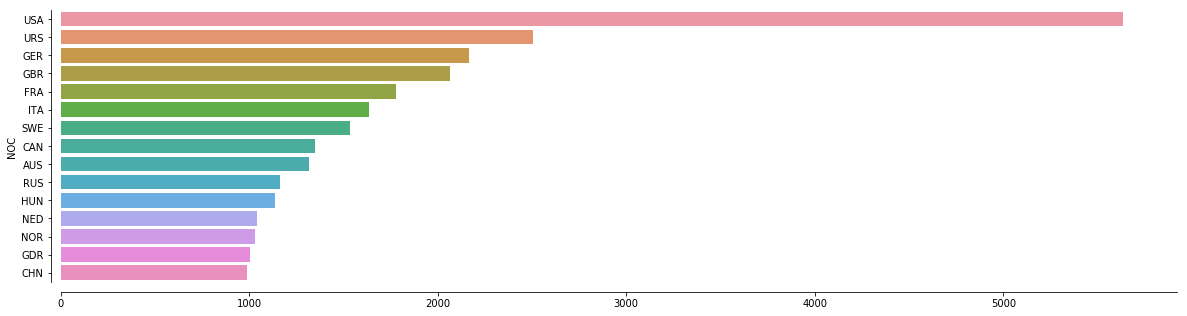

In [87]:
medal_distribution_by_country = medal_distribution_by_country.nlargest(15)
plt.figure(figsize=(20,5))
sns.barplot(y=medal_distribution_by_country.index,x=medal_distribution_by_country.values)
sns.despine(offset=10)
plt.show()

Most medals of all three kinds won by different countries is as follows:

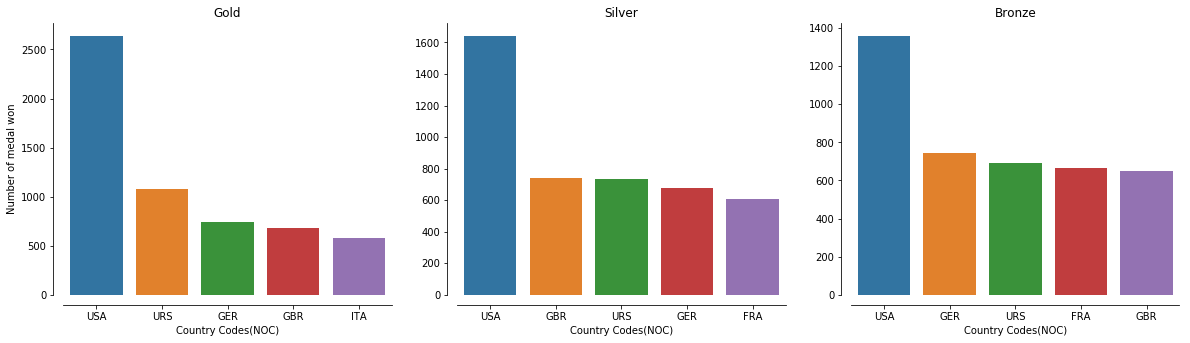

In [141]:
gold = data[data['Medal']=='Gold'].groupby('NOC')['ID'].count().reset_index().nlargest(5,columns='ID')
silver = data[data['Medal']=='Silver'].groupby('NOC')['ID'].count().reset_index().nlargest(5,columns='ID')
bronze = data[data['Medal']=='Bronze'].groupby('NOC')['ID'].count().reset_index().nlargest(5,columns='ID')
fig, axes = plt.subplots(1,3, figsize=(20, 5))
sns.barplot(data=gold,x='NOC',y='ID',ax=axes[0])
sns.barplot(data=silver,x='NOC',y='ID',ax=axes[1])
sns.barplot(data=bronze,x='NOC',y='ID',ax=axes[2])
sns.despine(offset=10)
m = ['Gold','Silver','Bronze']
for i in range(0,3):
    axes[i].set_title(m[i])
    axes[i].set_xlabel('Country Codes(NOC)')
    axes[i].set_ylabel('')
axes[0].set_ylabel('Number of medal won')
plt.show()

Most medal won by athletes are!

In [146]:
data.groupby('Name',as_index=False)['Medal'].count().nlargest(5,columns='Medal')

,Name,Medal
86745,"Michael Fred Phelps, II",28
73140,Larysa Semenivna Latynina (Diriy-),18
93738,Nikolay Yefimovich Andrianov,15
16202,Borys Anfiyanovych Shakhlin,13
29509,Edoardo Mangiarotti,13


###### Top Participating countries in Olympics over year

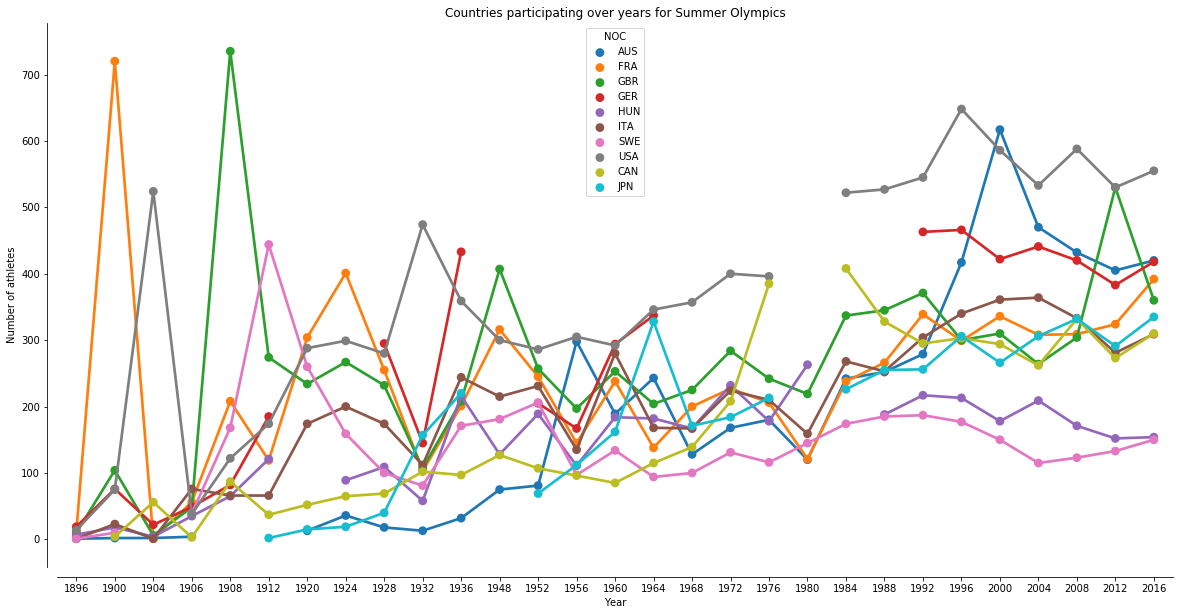

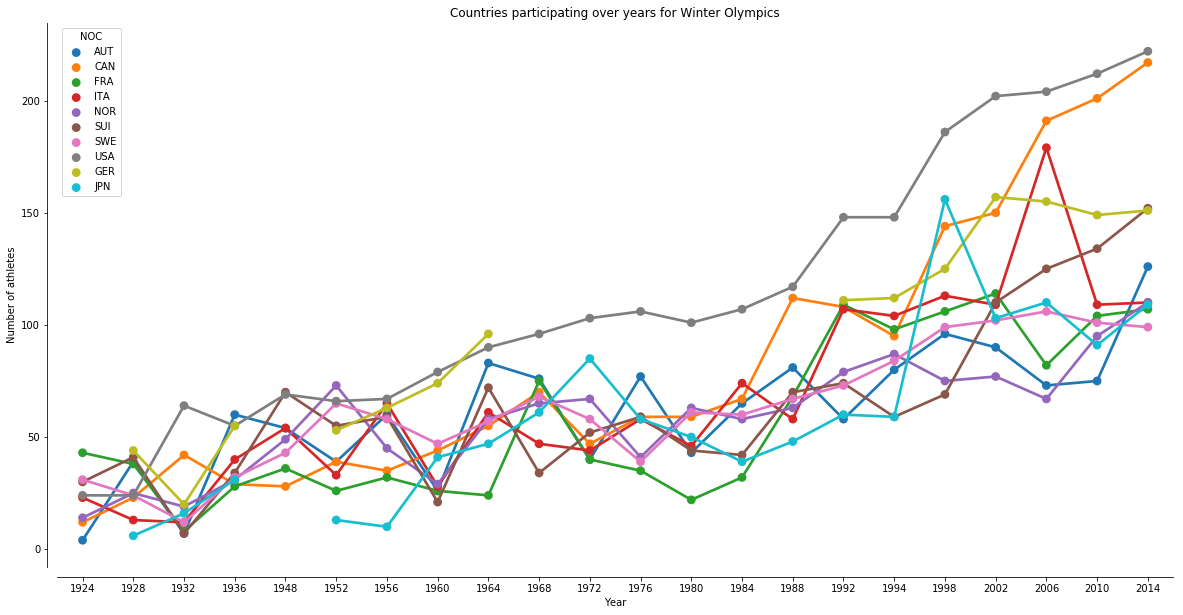

In [166]:
x = summer['NOC'].value_counts().nlargest(10)
y = summer[summer['NOC'].isin(list(x.index))]
tmp = y.groupby(['Year','NOC'])['ID'].nunique().reset_index()
#display(tmp)
plt.figure(figsize=(20,10))
sns.pointplot(data=tmp,x='Year',y='ID',hue='NOC')
plt.ylabel("Number of athletes")
plt.title("Countries participating over years for Summer Olympics")
sns.despine(offset=10)

x = winter['NOC'].value_counts().nlargest(10)
y = winter[winter['NOC'].isin(list(x.index))]
tmp = y.groupby(['Year','NOC'])['ID'].nunique().reset_index()
#display(tmp)
plt.figure(figsize=(20,10))
sns.pointplot(data=tmp,x='Year',y='ID',hue='NOC')
plt.ylabel("Number of athletes")
plt.title("Countries participating over years for Winter Olympics")
sns.despine(offset=10)